In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras import regularizers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
enc = 32
inputimg = keras.Input(shape = (784,))
encoded = layers.Dense(enc, activation = 'relu',
                      activity_regularizer = regularizers.l1(0.00001))(inputimg)
decoded = layers.Dense(784, activation = 'sigmoid')(encoded)
autoencoder = keras.Model(inputimg, decoded)

In [3]:
import keras
encoder = keras.Model(inputimg, encoded)
encinput = keras.Input(shape = (enc,))
declayer = autoencoder.layers[-1]
decoder = keras.Model(encinput, declayer(encinput))

In [4]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [5]:
(xtrain,_), (xtest,_) = mnist.load_data()
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

In [6]:
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
print(xtrain.shape, xtest.shape)

(60000, 784) (10000, 784)


In [7]:
import keras
autoencoder.fit(xtrain, xtrain, epochs = 50, batch_size = 256, shuffle = True, validation_data = (xtest, xtest))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2770 - val_loss: 0.1918
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1725 - val_loss: 0.1551
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1457 - val_loss: 0.1354
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1301 - val_loss: 0.1231
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1199 - val_loss: 0.1148
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1128 - val_loss: 0.1088
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1077 - val_loss: 0.1044
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1039 - val_loss: 0.1012
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1012 - val_loss: 0.0989
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0994 - val_loss: 0.0975

In [8]:
encodedimgs = encoder.predict(xtest)
decodedimgs = decoder.predict(encodedimgs)

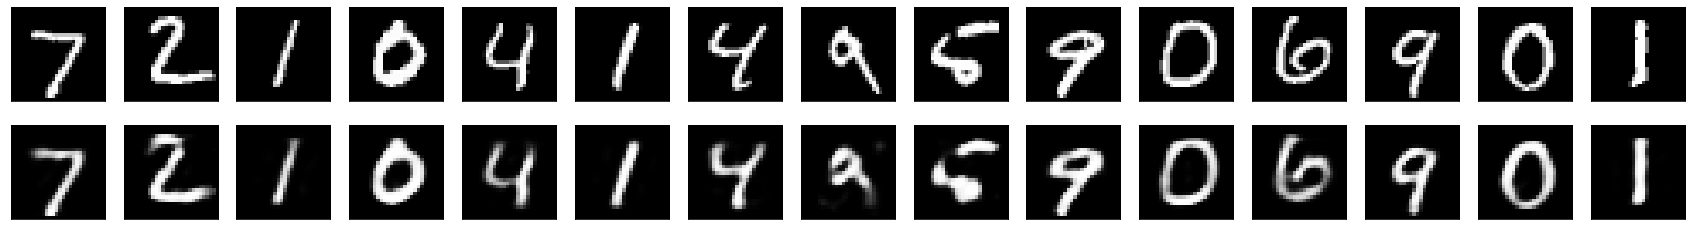

In [9]:
import matplotlib.pyplot as plt
import keras
n = 15
plt.figure(figsize = (30, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodedimgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)